In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer 

In [2]:
data = pd.read_csv("Credit_Risk.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


In [4]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


In [6]:
se_mode = SimpleImputer(strategy="most_frequent",missing_values = np.nan)
se_mean = SimpleImputer(strategy="mean",missing_values = np.nan)
se_median = SimpleImputer(strategy="median",missing_values = np.nan)

In [7]:
data.loc[:,["Gender","Married","Dependents","Self_Employed","Credit_History"]] = se_mode.fit_transform(data.loc[:,["Gender","Married","Dependents","Self_Employed","Credit_History"]])

In [8]:
data.iloc[:,8:9] = se_mean.fit_transform(data.iloc[:,8:9])

In [9]:
data.iloc[:,9:10] = se_median.fit_transform(data.iloc[:,9:10])

In [10]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [49]:
def outlier_removal(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df_new = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis = 1)] # ~ - Tilda
    return df_new

In [50]:
data = outlier_removal(data)

C:\Users\AAYUSHI\AppData\Local\Temp\ipykernel_3404\1169378182.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_new = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis = 1)] # ~ - Tilda


In [11]:
data.shape

(614, 13)

In [12]:
data.iloc[:,1:6]= pd.get_dummies(data.iloc[:,1:6])
data.iloc[:,11:12] = pd.get_dummies(data.iloc[:,11:12])

In [14]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,1,1,0,1,5849,0.0,146.412162,360.0,1.0,0,1
1,LP001003,0,1,0,1,0,4583,1508.0,128.000000,360.0,1.0,1,0
2,LP001005,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,0,1
3,LP001006,0,1,0,1,1,2583,2358.0,120.000000,360.0,1.0,0,1
4,LP001008,0,1,1,0,1,6000,0.0,141.000000,360.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,0,1,0,1,2900,0.0,71.000000,360.0,1.0,1,1
610,LP002979,0,1,0,1,0,4106,0.0,40.000000,180.0,1.0,1,1
611,LP002983,0,1,0,1,0,8072,240.0,253.000000,360.0,1.0,0,1
612,LP002984,0,1,0,1,0,7583,0.0,187.000000,360.0,1.0,0,1


In [15]:
import seaborn as sns

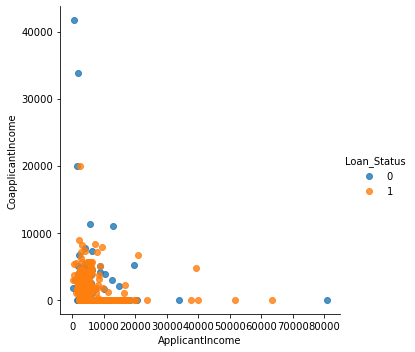

In [21]:
sns.lmplot(data=data , x = "ApplicantIncome", y = "CoapplicantIncome" ,hue= "Loan_Status",fit_reg=False)

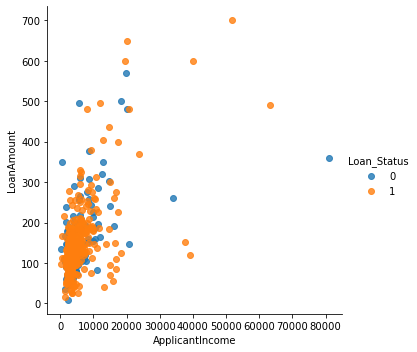

In [18]:
sns.lmplot(data=data , x = "ApplicantIncome", y = "LoanAmount" ,hue= "Loan_Status",fit_reg=False)

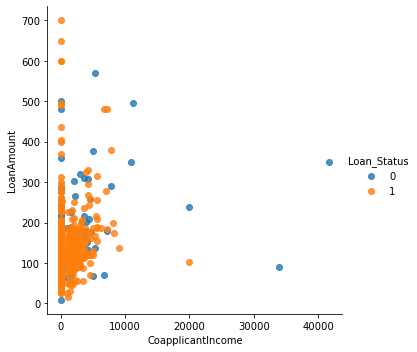

In [19]:
sns.lmplot(data=data , x = "CoapplicantIncome", y = "LoanAmount" ,hue= "Loan_Status",fit_reg=False)

<AxesSubplot:xlabel='Gender', ylabel='count'>

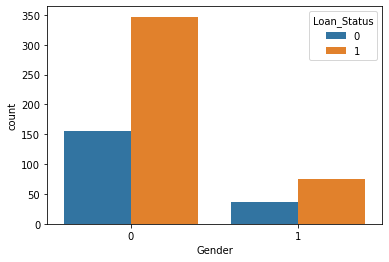

In [28]:
import matplotlib.pyplot as plt
sns.countplot(data= data , x= "Gender" , hue= "Loan_Status")

<AxesSubplot:xlabel='Married', ylabel='count'>

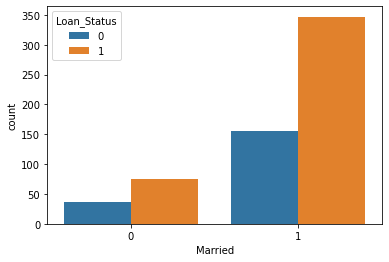

In [29]:
sns.countplot(data= data , x= "Married" , hue= "Loan_Status")

<AxesSubplot:xlabel='Dependents', ylabel='count'>

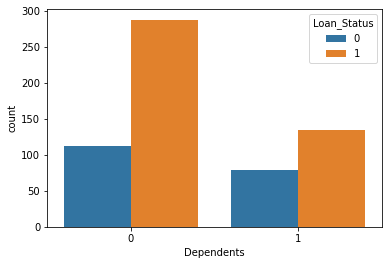

In [30]:
sns.countplot(data= data , x= "Dependents" , hue= "Loan_Status")

<AxesSubplot:xlabel='Education', ylabel='count'>

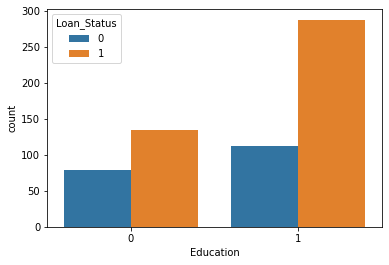

In [31]:
sns.countplot(data= data , x= "Education" , hue= "Loan_Status")

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

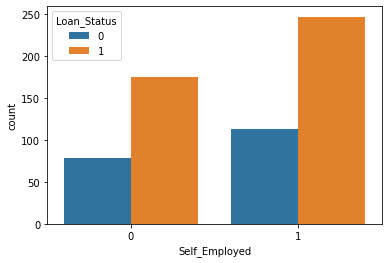

In [32]:
sns.countplot(data= data , x= "Self_Employed" , hue= "Loan_Status")

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

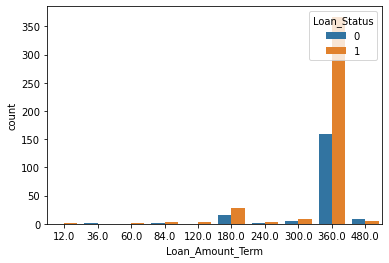

In [33]:
sns.countplot(data= data , x= "Loan_Amount_Term" , hue= "Loan_Status")

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

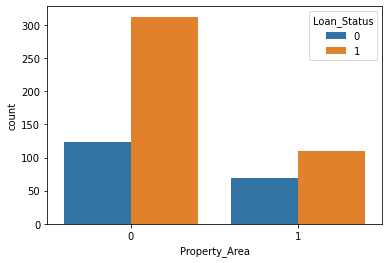

In [35]:
sns.countplot(data= data , x= "Property_Area" , hue= "Loan_Status")

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

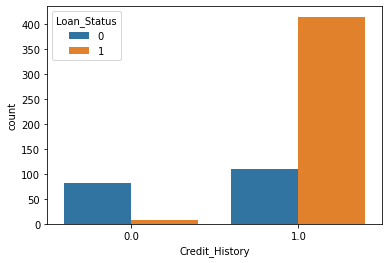

In [36]:
sns.countplot(data= data , x= "Credit_History" , hue= "Loan_Status")

# By observing the above plottings we can conclude Credit_History plays a vital role in the determination of Loan_Status